## DataWhale AI 夏令营第二期--机器学习赛道--Task1笔记

### 1、赛题背景

<a href="https://challenge.xfyun.cn/topic/info?type=electricity-demand&ch=dw24_3Gp2Ih" target="_blank">赛事官网</a>

随着全球经济的快速发展和城市化进程的加速，电力系统面临着越来越大的挑战。电力需求的准确预测对于电网的稳定运行、能源的有效管理以及可再生能源的整合至关重要。

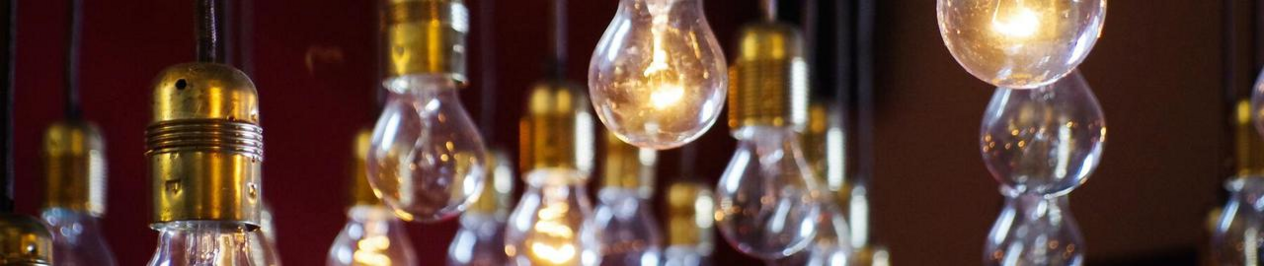

然而，电力需求受到多种因素的影响，为了提高电力需求预测的准确性和可靠性，推动智能电网和可持续能源系统的发展，本场以“电力需求预测”为赛题的数据算法挑战赛。选手需要根据历史数据构建有效的模型，能够准确的预测未来电力需求。

### 2、赛题任务

给定多个房屋对应电力消耗历史N天的相关序列数据等信息，预测房屋对应电力的消耗。

### 3、评审规则

#### 3.1数据说明

赛题数据由训练集和测试集组成，为了保证比赛的公平性，将每日日期进行脱敏，用1-N进行标识，即1为数据集最近一天，其中1-10为测试集数据。数据集由字段id（房屋id）、 dt（日标识）、type（房屋类型）、target（实际电力消耗）组成。

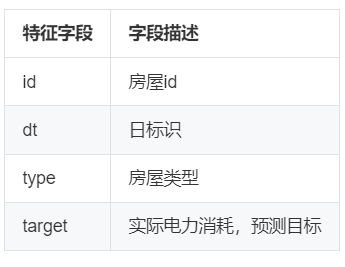


#### 3.2评审规则

预测结果以 mean square error 作为评判标准，具体公式如下：

$\frac{1}{n} \sum_{n=1}^{n} (y_i - \bar{y_i})^2$

其中，$y_i$是真实电力消耗，$\bar{y_i}$是预测电力消耗。


#### 3.3评测及排行

1）每支团队每天最多提交3次。

2）赛事提供下载数据，选手在本地进行算法调试，在比赛页面提交结果。

3）排行按照得分从低到高排序，排行榜将选择团队的历史最优成绩进行排名。

4）允许使用开源模型，但不允许使用外部数据集。

### 4、作品提交

<a href="https://challenge.xfyun.cn/topic/info?type=electricity-demand&option=tjjg&ch=dw24_3Gp2Ih" target="_blank">提交地址</a>

1.文件格式：预测结果文件按照.csv格式提交

2.文件大小：无要求

3.提交次数：每支队伍每天最多3次

4.预测结果文件详细说明：

1）以csv格式提交，编码为UTF-8，第一行为表头；

2）提交前请确保预测结果的格式与sample_submit.csv中的格式一致。具体格式如下：

1 id,dt,target

2 00037f39cf,1,0

3 00037f39cf,2,0

4 00037f39cf,3,0

5 ...

### 5、赛题解读

作为一个初学者来说，刚开始我没看懂数据集中的特征与赛题有啥关系，细细读来才搞懂

某房屋（id)是XX类型(type)的房屋，在第N天(dt)用了YY度(target)电

我们要做的就是根据当前的数据完成未来用电的预测，并提交；提交格式为id type target

### 6、baseline解读

In [ ]:
# 1. 导入需要用到的相关库
# 导入 pandas 库，用于数据处理和分析
import pandas as pd
# 导入 numpy 库，用于科学计算和多维数组操作
import numpy as np

# 2. 读取训练集和测试集
# 使用 read_csv() 函数从文件中读取训练集数据，文件名为 'train.csv'
train = pd.read_csv('./data/data283931/train.csv')
# 使用 read_csv() 函数从文件中读取测试集数据，文件名为 'train.csv'
test = pd.read_csv('./data/data283931/test.csv')

# 3. 计算训练数据最近11-20单位时间内对应id的目标均值
target_mean = train[train['dt']<=20].groupby(['id'])['target'].mean().reset_index()

# 4. 将target_mean作为测试集结果进行合并
test = test.merge(target_mean, on=['id'], how='left')

# 5. 保存结果文件到本地
test[['id','dt','target']].to_csv('submit.csv', index=None)

Baseline中使用的处理方式比较简单，选择使用11-20天的均值作为预测结果进行提交

第一步导入pandas和numpy库进行数据处理

第二步读取数据，训练集和测试集

第三步计算均值

第四步通过id作为标识将结果放入测试集

第五步导出测试集